#Introduction to BLAST in UNIX-Bash

## Overview
BLAST (Basic Local Alignment Search Tool) is a widely used bioinformatics tool for comparing sequence data.
This tutorial will cover different BLAST commands, how to format a database using `makeblastdb`,
and the differences between various BLAST tools.


## Types of BLAST Searches
| BLAST Type | Query Type | Database Type | Description |
|------------|------------|---------------|-------------|
| `blastn` | Nucleotide | Nucleotide | Compares nucleotide sequences |
| `blastp` | Protein | Protein | Compares protein sequences |
| `blastx` | Nucleotide | Protein | Translates nucleotide query and searches against protein database |
| `tblastn` | Protein | Nucleotide | Searches protein query against translated nucleotide database |
| `tblastx` | Nucleotide | Nucleotide | Translates both query and database before comparison |

You might be familiar with nabi blast web server https://blast.ncbi.nlm.nih.gov/Blast.cgi

Install blast if you are using colab. If you have blast ncbi do not run this cell

In [ ]:
!apt install ncbi-blast+

## Let's Practice BLAST with TYLCV Sequences
In this tutorial, we will practice different BLAST strategies using viral sequences from **Tomato yellow leaf curl virus (TYLCV)**.


The following files contain nucleotide or protein sequences in FASTA format:

| File Name | Description |
|-----------|------------|
| `cds_from_genomic.fna` | Nucleotide sequences of genes |
| `GCA_000858205.1_ViralProj15182_genomic.fna` | Complete genome sequence of TYLCV |
| `mutant_virus.fna` | Complete genome sequence of a mutant TYLCV |
| `mutantx.fa` | Protein sequence of a mutant TYLCV |
| `protein.faa` | Complete proteins (proteome) of TYLCV |


Get the fasta files of the sequences that we need for this activity

In [ ]:
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/general_task_blast/main/mutantx.faa
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/general_task_blast/main/GCA_000858205.1_ViralProj15182_genomic.fna
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/general_task_blast/main/mutant.fna
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/general_task_blast/main/cds_from_genomic.fna
!wget https://raw.githubusercontent.com/PlantHealth-Analytics/general_task_blast/main/protein.faa

BLASTN: Compare nucleotide sequence against a nucleotide sequence (pairwise)

In [10]:
!blastn -query mutant.fna -subject GCA_000858205.1_ViralProj15182_genomic.fna -out blastn_output.txt

Check the results blastn_output.txt. Describe the components of the output file. What is the meanning of the Scores and the E values?

BLASTP: Compare protein sequence against a protein sequence (pairwise)


In [11]:
!blastp -query mutantx.faa -subject protein.faa -out blastp_output.txt


When working with a large number of sequences in BLAST, running searches against raw FASTA files is inefficient. BLAST requires an indexed database to quickly retrieve matching sequences instead of scanning through a plain text FASTA file each time. The makeblastdb command converts a FASTA file into a structured BLAST database, significantly improving search speed and efficiency.

In [ ]:
!makeblastdb -in protein.faa -dbtype prot

In [13]:
!blastp -query mutantx.faa -db protein.faa -out blastp_output2.txt

Check the results in blastp_output2.txt. Discuss

## When to Use `-subject` vs. `-db`
| Scenario | Use `-subject` | Use `-db` |
|-----------|---------------|-----------|
| Comparing a single query to one or a few sequences | ✅ | ❌ |
| Querying against a large protein dataset | ❌ | ✅ |
| Running BLAST once or twice | ✅ | ❌ |
| Running BLAST multiple times efficiently | ❌ | ✅ |


# BLASTX: Translate nucleotide query to protein and search against protein database


In [14]:
!blastx -query mutant.fna -db protein.faa -out blastx_output.txt


Check the results in blastx_output.txt. Discuss.

# TBLASTN: Compare protein query against translated nucleotide database


Lets format GCA_000858205.1_ViralProj15182_genomic.fna as a db first

In [ ]:
#in this case -dbtype is nucl because we are working with nucleotide
!makeblastdb -in GCA_000858205.1_ViralProj15182_genomic.fna -dbtype nucl

In [28]:
!tblastn -query mutantx.faa -db GCA_000858205.1_ViralProj15182_genomic.fna -out tblastn_output.txt -outfmt 6


Check the results in tblastn_output.txt. Discuss

Check the results in tblastn_output.txt . Discuss

# TBLASTX: Translate nucleotide sequences in both query and database before comparison

In [29]:
!tblastx -query mutant.fna -db GCA_000858205.1_ViralProj15182_genomic.fna -out tblastx_output.txt


Check the results in tblastx_output.txt. Discuss

## Word Size Option in BLAST
The `-word_size` option affects sensitivity and speed of BLAST searches.
Smaller values increase sensitivity but slow down searches, while larger values speed up searches but may miss weak alignments.


In [30]:
# Example word size variations
!blastn -query mutant.fna -db GCA_000858205.1_ViralProj15182_genomic.fna -word_size 7 -out blastn_output_sens.txt
!blastn -query mutant.fna -db GCA_000858205.1_ViralProj15182_genomic.fna -word_size 28 -out blastn_output_fast.txt


The default format is a large file containing detailed information. There are several formats that display reduced information. For example, format 6 is a reduced format in a table. Run an example with this format and check the results

In [26]:
!blastx -query mutant.fna -db protein.faa -out blastx_output.txt -outfmt 6

Tab format

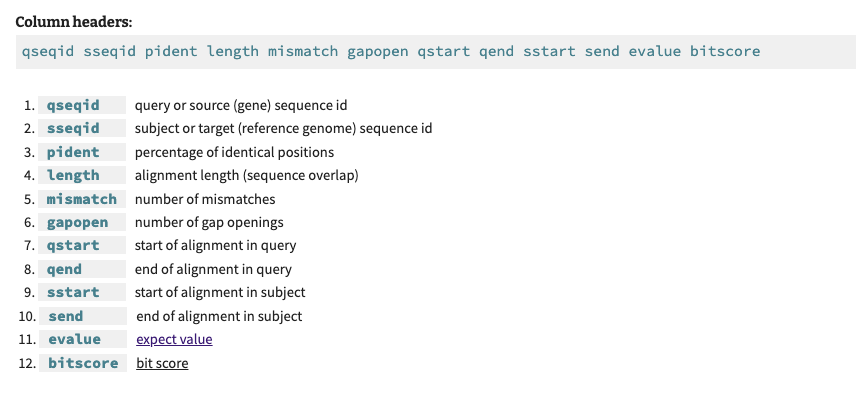